<a href="https://colab.research.google.com/github/NigGusta/ICD-Projeto-Final/blob/main/exploracao_inicial_secoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import folium
import pandas as pd
import numpy as np
from folium import plugins

In [34]:
secoes = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/secoes_jp.csv')

In [35]:
secoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ano                            3222 non-null   int64  
 1   turno                          3222 non-null   int64  
 2   sigla_uf                       3222 non-null   object 
 3   id_municipio                   3222 non-null   int64  
 4   id_municipio_tse               3222 non-null   int64  
 5   zona                           3222 non-null   int64  
 6   secao                          3222 non-null   int64  
 7   tipo_secao_agregada            3222 non-null   object 
 8   numero                         3222 non-null   int64  
 9   nome                           3222 non-null   object 
 10  tipo                           3222 non-null   object 
 11  endereco                       3222 non-null   object 
 12  bairro                         3222 non-null   o

In [36]:
# Filtrando apenas as seções do segundo turno
secoes = secoes[(secoes.turno==2)]

In [37]:
# Quais as zonas eleitorais de João Pessoas?
for i in secoes.zona.unique():
  print(i)

64
76
1
70
77


In [38]:
# Verificando os valores nulos
secoes.isnull().sum()

ano                                0
turno                              0
sigla_uf                           0
id_municipio                       0
id_municipio_tse                   0
zona                               0
secao                              0
tipo_secao_agregada                0
numero                             0
nome                               0
tipo                               0
endereco                           0
bairro                             0
cep                                0
telefone                         861
latitude                          25
longitude                         25
situacao                           0
situacao_zona                      0
situacao_secao                     0
situacao_localidade                0
situacao_secao_acessibilidade      0
quantidade_eleitores               0
quantidade_eleitores_eleicao       0
dtype: int64

In [40]:
#Filtrando os valores nulos
secoes.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [41]:
# Filtrando apenas as colunas de interesse
secoes = secoes[['turno', 'zona', 'secao', 'nome', 'endereco', 'bairro', 'latitude', 'longitude', 'situacao',
       'situacao_zona', 'situacao_secao', 'situacao_localidade',
       'situacao_secao_acessibilidade', 'quantidade_eleitores',
       'quantidade_eleitores_eleicao' ]]

Quais zonas eleitorais possuem mais eleitores?

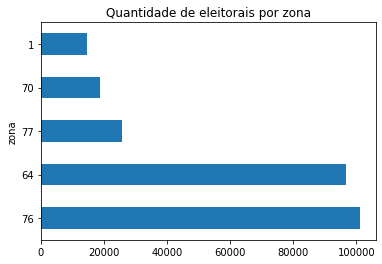

In [42]:
secoes.groupby('zona')['quantidade_eleitores'].sum().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de eleitorais por zona');

Quais zonas possuem mais seções com acessibilidade?

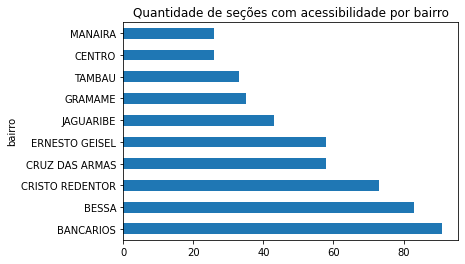

In [58]:
secoes.groupby('bairro')['situacao_secao_acessibilidade'].count().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de seções com acessibilidade por bairro');

Quais seções possuem mais eleitores?

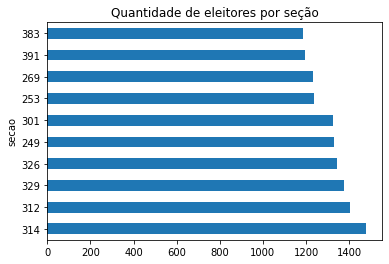

In [43]:
secoes.groupby('secao')['quantidade_eleitores'].sum().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de eleitores por seção');

Quais os bairros com mais seções eleitorais?

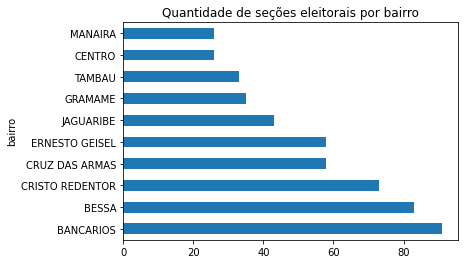

In [44]:
secoes.groupby('bairro')['secao'].count().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de seções eleitorais por bairro');

Quais os bairros com mais eleitores?

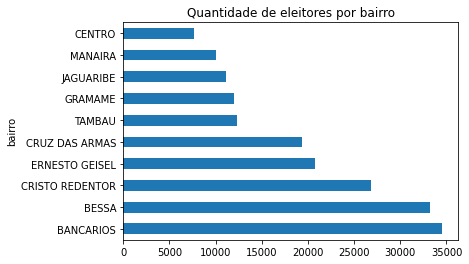

In [45]:
secoes.groupby('bairro')['quantidade_eleitores'].sum().sort_values(ascending = False).head(10).plot(kind='barh', title = 'Quantidade de eleitores por bairro');

In [46]:
secoes_coord = secoes[['zona',  'secao', 'bairro', 'latitude', 'longitude', 'quantidade_eleitores']]

In [47]:
secoes_coord.sort_values(by = 'quantidade_eleitores', ascending = False)

,zona,secao,bairro,latitude,longitude,quantidade_eleitores
22,64,383,CRISTO REDENTOR,-7.160448,-34.877434,440
672,64,245,CRISTO REDENTOR,-7.160448,-34.877434,437
2382,64,93,CRISTO REDENTOR,-7.157929,-34.872929,437
3208,1,254,MANDACARU,-7.099962,-34.870060,437
3206,1,249,MANDACARU,-7.099962,-34.870060,437
...,...,...,...,...,...,...
524,64,475,CRISTO REDENTOR,-7.153078,-34.878489,72
1107,64,476,CRISTO REDENTOR,-7.153780,-34.877843,45
1613,64,468,JAGUARIBE,-7.134578,-34.873371,29
368,77,404,JOAO PAULO II,-7.173617,-34.880927,7


In [48]:
secoes_coord.shape

(728, 6)

In [49]:
coordenadas = secoes_coord[['latitude', 'longitude',  'quantidade_eleitores']]

In [50]:
coordenadas.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [51]:
mapa_secoes = folium.Map(location=[-7.17088, -34.86536],
                        width = "100%",
                        height = "100%",
                        zoom_start=12, 
                        control_scale = True) 

In [52]:
mapa_secoes = mapa_secoes.add_child(plugins.HeatMap(coordenadas))

In [54]:
# mapa de calor da quantidade de eleitores por seção eleitoral
mapa_secoes